In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score

In [221]:
can=pd.read_csv("/content/cell_samples.csv")

In [222]:
can.head(10)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [223]:
can.tail(10)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
689,1,1,1,1,2,1,1,1,8,2
690,1,1,1,3,2,1,1,1,1,2
691,5,10,10,5,4,5,4,4,1,4
692,3,1,1,1,2,1,1,1,1,2
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [224]:
can.shape

(699, 10)

In [225]:
can.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

benign cells- Not Dangerous cells

Malignant cells- Cancerous

Clump- refers to the Clump Thickness.Higher Thickness higher chance of cancer

UnifSize-Uniformity of Cell Size.Cells in benign samples typically have more uniform sizes, while malignant cells vary more in size.

UnifShape-Uniformity of Cell Shape. Benign cells generally have more uniform shapes compared to malignant cells, which can vary significantly.

MargAdh-Marginal Adhesion. Cancerous cells often lose this adhesion, leading to higher values in this feature.

SingEpiSize-Single Epithelial Cell Size.Higher Size Higher chances of cancer

BareNuc-Bare Nuclei.Higher Size Higher chances of cancer

BlandChrom-Bland Chromatin.In benign cells, chromatin is typically evenly distributed, while in malignant cells, it might be irregular.

NormNucl-Normal Nucleoli.Benign cells typically have fewer and smaller nucleoli, while malignant cells have prominent and irregular nucleoli.

Mit-Mitoses. It counts the number of cells undergoing mitosis (cell division). A higher number of mitotic cells can indicate a higher level of abnormal cell proliferation, suggesting malignancy.

Class- Target Variable where  2 for benign and 4 for malignant

In [226]:
can.isnull().sum()


Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [227]:
can.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695     True
696    False
697    False
698    False
Length: 699, dtype: bool

In [228]:
can=can.drop_duplicates()

In [229]:
can.duplicated().sum()

0

In [230]:
can.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        463 non-null    int64 
 1   UnifSize     463 non-null    int64 
 2   UnifShape    463 non-null    int64 
 3   MargAdh      463 non-null    int64 
 4   SingEpiSize  463 non-null    int64 
 5   BareNuc      463 non-null    object
 6   BlandChrom   463 non-null    int64 
 7   NormNucl     463 non-null    int64 
 8   Mit          463 non-null    int64 
 9   Class        463 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 39.8+ KB


It gives the information about the Data.

No. of Observation-698

No.of Columns-10

Datatypes- Object and int64

In [231]:
can.describe(include="all")

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,463.000000,463.000000,463.000000,463.000000,463.000000,463,463.000000,463.000000,463.000000,463.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,172,NaN,NaN,NaN,NaN
mean,5.323974,4.174946,4.239741,3.691145,3.840173,NaN,4.170626,3.803456,1.885529,3.028078
std,2.873752,3.239645,3.121767,3.152280,2.446914,NaN,2.639002,3.385452,2.043326,1.000687
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,NaN,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,NaN,7.000000,7.000000,2.000000,4.000000


In [232]:
mask = can.applymap(lambda x: x == '?')

# Get the indices of rows and columns where '?' is found
indices = np.where(mask)

# Ensure indices are correctly fetched

positions = list(zip(indices[0], indices[1]))



for row, col in positions:
    print(f"'?' found at row {row}, column {can.columns[col]}")


'?' found at row 23, column BareNuc
'?' found at row 38, column BareNuc
'?' found at row 123, column BareNuc
'?' found at row 126, column BareNuc
'?' found at row 137, column BareNuc
'?' found at row 142, column BareNuc
'?' found at row 188, column BareNuc
'?' found at row 200, column BareNuc
'?' found at row 218, column BareNuc
'?' found at row 227, column BareNuc
'?' found at row 229, column BareNuc
'?' found at row 232, column BareNuc
'?' found at row 243, column BareNuc
'?' found at row 424, column BareNuc


In [233]:
can.replace('?', np.nan, inplace=True)

# Convert columns to numeric (ignoring non-numeric values)
can = can.apply(pd.to_numeric, errors='ignore')

# Replace NaN with mean inplace
can.fillna(can.mean(), inplace=True)

print("DataFrame after replacing '?' with mean:")
print(can)

DataFrame after replacing '?' with mean:
     Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  BlandChrom  \
0        5         1          1        1            2      1.0           3   
1        5         4          4        5            7     10.0           3   
2        3         1          1        1            2      2.0           3   
3        6         8          8        1            3      4.0           3   
4        4         1          1        3            2      1.0           3   
..     ...       ...        ...      ...          ...      ...         ...   
693      3         1          1        1            2      1.0           2   
694      3         1          1        1            3      2.0           1   
696      5        10         10        3            7      3.0           8   
697      4         8          6        4            3      4.0          10   
698      4         8          8        5            4      5.0          10   

     NormNucl  Mit  Cl

Histograms:

Helps to check continuous features


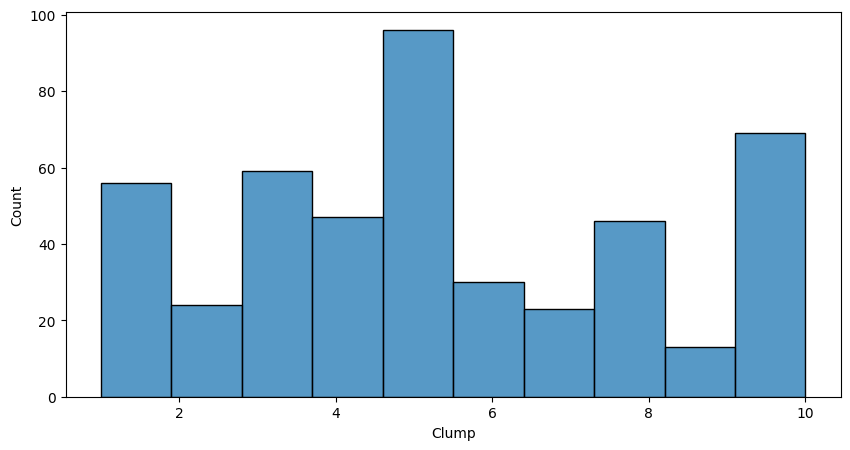

In [234]:
plt.figure(figsize=(10,5))
sns.histplot(can['Clump'])
plt.show()

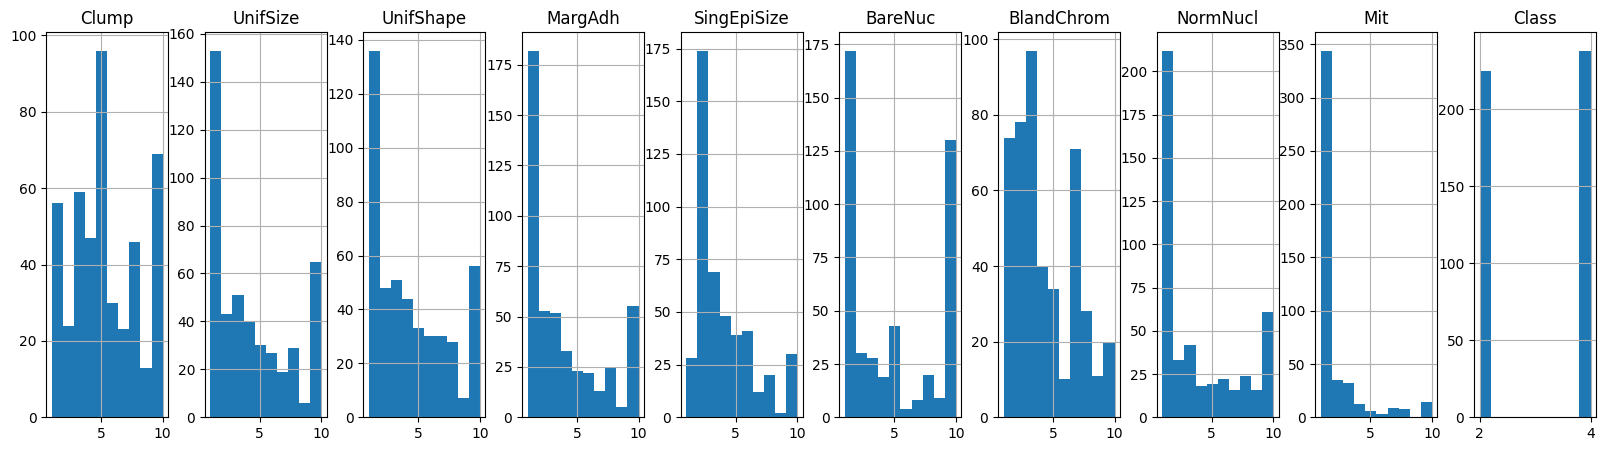

In [235]:
can.hist(layout=(1,10), figsize=(20,5))
plt.show()

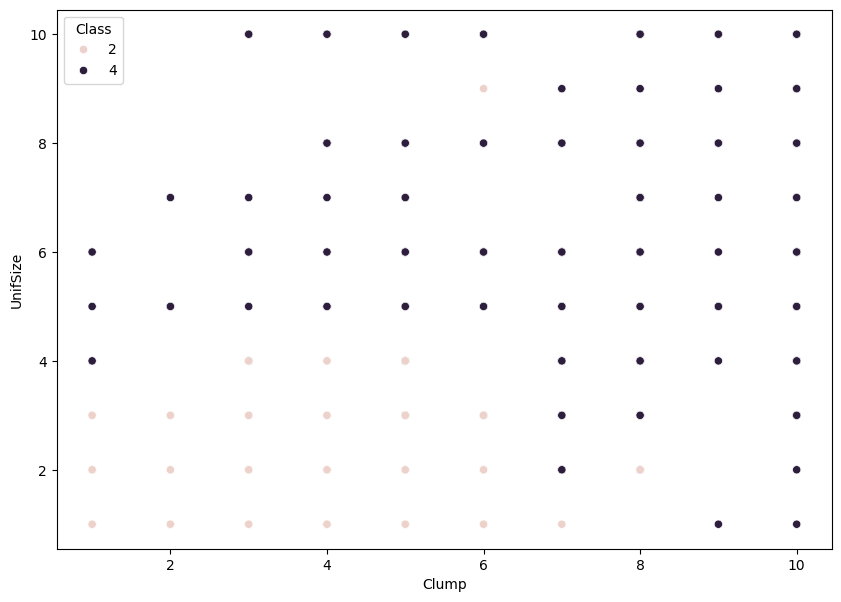

In [236]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=can, y='UnifSize', x='Clump', hue='Class')
plt.show()

If the Uniformity in cell size is higher, there is a higher chance of it being a Malignant Cell

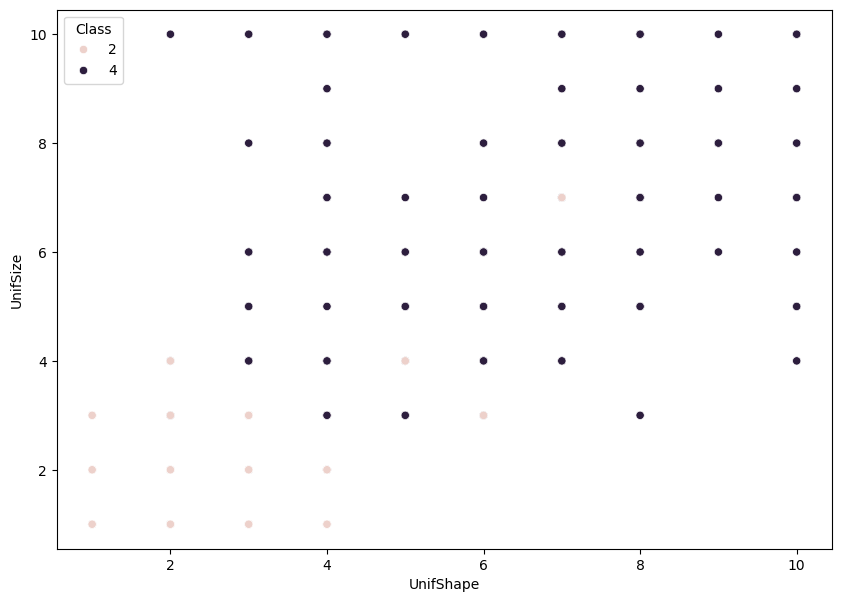

In [237]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=can, y='UnifSize', x='UnifShape', hue='Class')
plt.show()

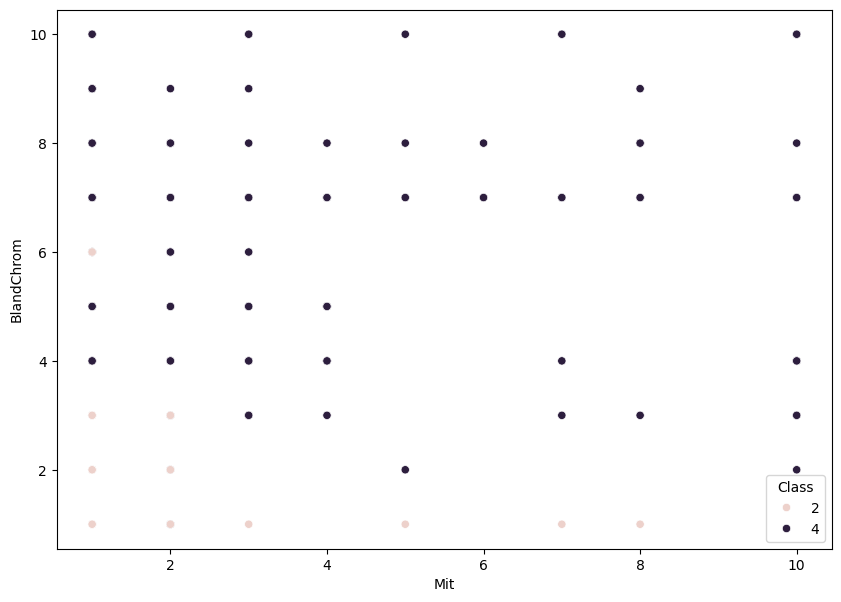

In [238]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=can, y='BlandChrom', x='Mit', hue='Class')
plt.show()

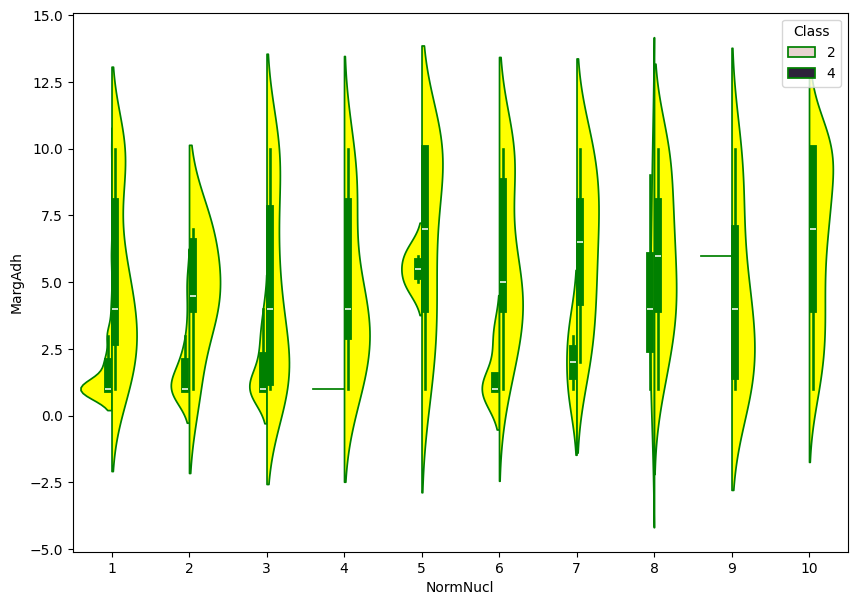

In [239]:
plt.figure(figsize=(10,7))
sns.violinplot(data=can, y='MargAdh', x='NormNucl',hue='Class', split=True,facecolor='yellow', edgecolor='green')
plt.show()

**Correlation Matrix**

In [240]:
correlation_matrix = can[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class']].corr()
correlation_matrix

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
Clump,1.000000,0.578156,0.588956,0.383573,0.432165,0.500246,0.496158,0.450853,0.296797,0.675748
UnifSize,0.578156,1.000000,0.877404,0.640096,0.689982,0.583524,0.712986,0.657170,0.403911,0.757623
UnifShape,0.588956,0.877404,1.000000,0.612415,0.649388,0.612718,0.687331,0.654724,0.381645,0.757932
MargAdh,0.383573,0.640096,0.612415,1.000000,0.528163,0.582902,0.611294,0.514134,0.358434,0.622371
SingEpiSize,0.432165,0.689982,0.649388,0.528163,1.000000,0.474448,0.554625,0.558757,0.434875,0.604709
BareNuc,0.500246,0.583524,0.612718,0.582902,0.474448,1.000000,0.601302,0.471172,0.257931,0.748007
BlandChrom,0.496158,0.712986,0.687331,0.611294,0.554625,0.601302,1.000000,0.607259,0.279795,0.707166
NormNucl,0.450853,0.657170,0.654724,0.514134,0.558757,0.471172,0.607259,1.000000,0.369716,0.639909
Mit,0.296797,0.403911,0.381645,0.358434,0.434875,0.257931,0.279795,0.369716,1.000000,0.360433
Class,0.675748,0.757623,0.757932,0.622371,0.604709,0.748007,0.707166,0.639909,0.360433,1.000000


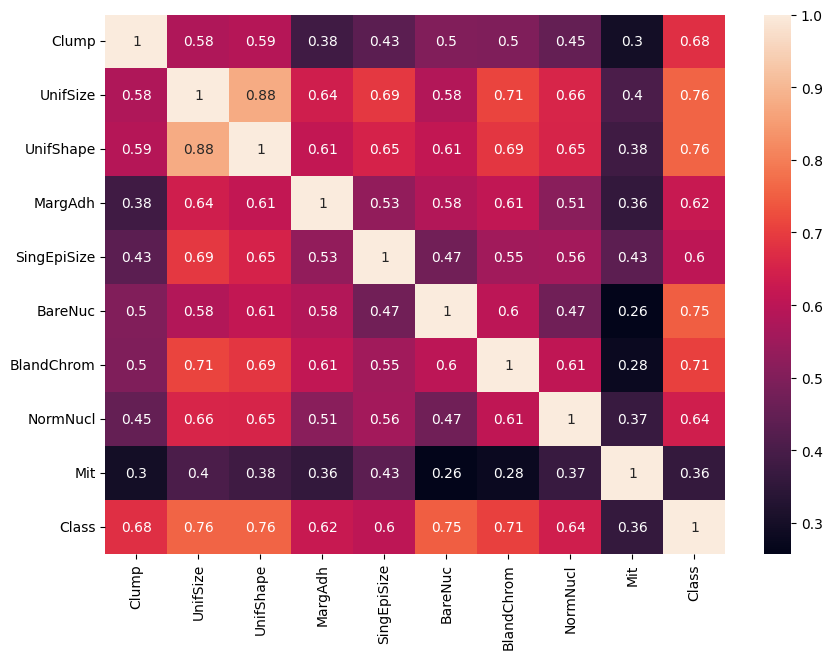

In [241]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Checking Data Balance

In [242]:
can['Class'].value_counts()

Class
4    238
2    225
Name: count, dtype: int64

In [243]:
x=can.drop('Class',axis=1)
y=can['Class']

In [244]:
x

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1.0,2,1,2
694,3,1,1,1,3,2.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [245]:
y

0      2
1      2
2      2
3      2
4      2
      ..
693    2
694    2
696    4
697    4
698    4
Name: Class, Length: 463, dtype: int64

In [246]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

**Regression Models**

**Linear Regression**

In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [249]:
linpred=linear.predict(x_test)

In [250]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [251]:
mse = mean_squared_error(y_test, linpred)
mae = mean_absolute_error(y_test, linpred)
r2 = r2_score(y_test, linpred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.20831735330593884
Mean Absolute Error: 0.3371900975672339
R^2 Score: 0.7916585581934477


**Logistic Regression**

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

In [254]:
logpred=logreg.predict(x_test)

In [255]:
mse = mean_squared_error(y_test, logpred)
mae = mean_absolute_error(y_test, logpred)
r2 = r2_score(y_test, logpred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.17204301075268819
Mean Absolute Error: 0.08602150537634409
R^2 Score: 0.8279370952821462


**Classification Models**

Decision Tree Classification

In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [258]:
dtpred=dt.predict(x_test)

In [259]:
print("Accuracy score:",accuracy_score(y_test,dtpred))



Accuracy score: 0.9139784946236559


Random Forest Classification

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [262]:
rfpred=rf.predict(x_test)

In [263]:
print("Accuracy score:",accuracy_score(y_test,rfpred))


Accuracy score: 0.967741935483871


Support Vector Classification(SVC)

In [264]:
from sklearn import svm

In [265]:
model = svm.SVC()

In [266]:
model.fit(x_train, y_train)

SVC()

In [267]:
svmpred=model.predict(x_test)

In [268]:
print("Accuracy score:",accuracy_score(y_test,svmpred))


Accuracy score: 0.956989247311828


KNN

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [271]:
knnpred=knn.predict(x_test)

In [272]:
print("Accuracy score:",accuracy_score(y_test,knnpred))


Accuracy score: 0.967741935483871


**Evalution Of Metrics Using KNN**

In [273]:
from sklearn.metrics import classification_report , confusion_matrix


In [274]:
knnpred = knn.predict(x_test)
cm = confusion_matrix(y_test , knnpred)

<Axes: >

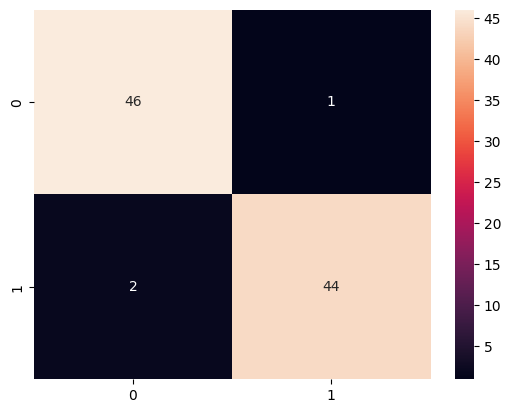

In [275]:
sns.heatmap(cm , annot = True)


In [276]:
Accuracy=46+44/47+46
Accuracy


92.93617021276596

In [277]:
precision=46/46+1
precision

2.0

In [278]:
Recall=46/46+2
Recall


3.0

In [279]:
f1=2*precision*Recall/precision+Recall
f1

9.0

In [280]:
print(classification_report(y_test , knnpred))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97        47
           4       0.98      0.96      0.97        46

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



In [281]:
final_data = pd.DataFrame({'Models':['LinearRegression','LogisticRegression','DecisonTree','RandomForest','SVC','KNN'],
             'ACC':[r2_score(y_test,linpred)*100,
                   r2_score(y_test,logpred)*100,
                   accuracy_score(y_test,dtpred)*100,
                   accuracy_score(y_test,rfpred)*100,
                   accuracy_score(y_test,svmpred)*100,
                   accuracy_score(y_test,knnpred)*100]})

In [282]:
final_data

,Models,ACC
0,LinearRegression,79.165856
1,LogisticRegression,82.793710
2,DecisonTree,91.397849
3,RandomForest,96.774194
4,SVC,95.698925
5,KNN,96.774194


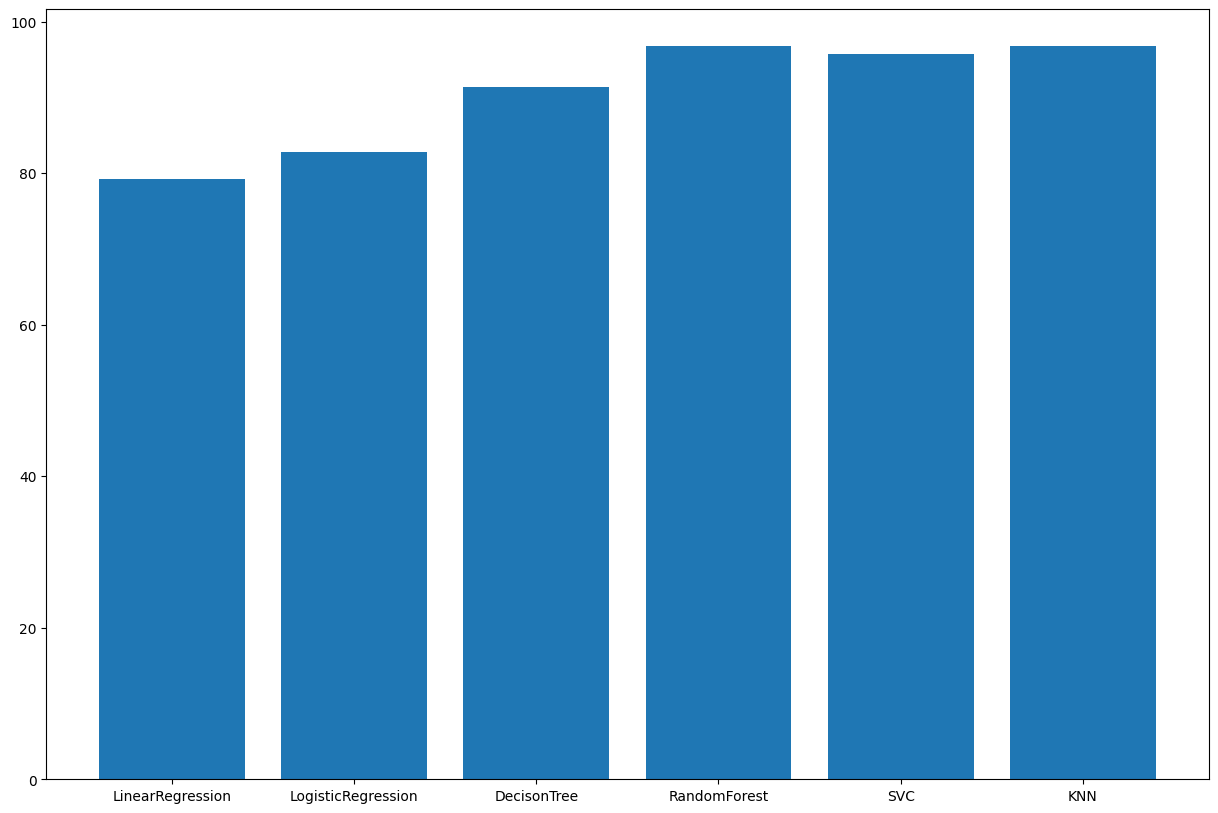

In [283]:
plt.figure(figsize=[15,10])
plt.bar(final_data['Models'],final_data['ACC'])
plt.show()


**Saving The Model**

In [284]:
x= can.drop('Class',axis=1)
y= can['Class']

In [285]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [286]:
import joblib

In [287]:
joblib.dump(knn,'CancerCellDetection')

['CancerCellDetection']

In [288]:
model1= joblib.load('CancerCellDetection')

In [289]:
nd=pd.DataFrame({
    'Clump':5 ,
    'UnifSize':10,
    'UnifShape':9,
    'MargAdh':3,
    'SingEpiSize':2,
    'BareNuc':8,
    'BlandChrom':6,
    'NormNucl':4,
    'Mit':7

},index=[0])

In [290]:
nd

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,10,9,3,2,8,6,4,7


In [291]:
p = model1.predict(nd)

In [292]:
p

array([4])

In [293]:
if p[0] == 2:
    print("Not Cancerous")
else:
    print("Cancerous")

Cancerous


In [299]:
nd1=pd.DataFrame({
    'Clump':1 ,
    'UnifSize':1,
    'UnifShape':1,
    'MargAdh':1,
    'SingEpiSize':2,
    'BareNuc':1,
    'BlandChrom':1,
    'NormNucl':1,
    'Mit':8

},index=[0])

In [300]:
nd1

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,1,1,1,1,2,1,1,1,8


In [301]:
p1 = model1.predict(nd1)

In [302]:
p1

array([2])

In [303]:
if p1[0] == 2:
    print("Not Cancerous")
else:
    print("Cancerous")

Not Cancerous
